In [5]:
import sys
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import style
style.use('ggplot')
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller 
from arch.unitroot import ADF
from statsmodels.stats.diagnostic import acorr_ljungbox 
from statsmodels.graphics.api import qqplot
import time
import datetime
pd.set_option('display.float_format', lambda x: '%.5f' % x) 
np.set_printoptions(precision=5, suppress=True) 
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Heiti TC']

In [43]:
#read data
tape0701 = pd.read_csv('/Users/gali/Downloads/Tapes/UoB_Set01_2025-07-01tapes.csv',names = ['time','price','num'])
tape0701

time  price  num
0         4.61900     94    4
1         5.42500     94    1
2         5.42500     95    3
3         7.50200     99    4
4        14.91100    113    1
...           ...    ...  ...
27466 30594.70600    108    2
27467 30595.48100    108    2
27468 30596.34900    108    3
27469 30596.59700    108    2
27470 30596.59700    107    2

[27471 rows x 3 columns]

In [47]:
#return the latest transaction price at the given time
def sel_time(t):
    #filter the data before the given time
    filtered_df = tape0701[(tape0701['time'] <= t)]

    # find the latest time point
    max_time_row = filtered_df.loc[filtered_df['time'].idxmax()]

    # get the correspondant price
    max_amount_value = max_time_row['price']

    print(max_amount_value)
    return(max_amount_value)

df = pd.DataFrame(columns=['price'], index=pd.Index([], name='time'))
for i in range(5,30597):
    df.loc[i] = sel_time(i)
print(df)


94.0
94.0
94.0
99.0
99.0
99.0
99.0
99.0
99.0
99.0
113.0
110.0
110.0
110.0
106.0
106.0
106.0
105.0
105.0
104.0
104.0
104.0
101.0
101.0
101.0
106.0
106.0
105.0
105.0
105.0
108.0
107.0
106.0
106.0
108.0
107.0
107.0
107.0
107.0
107.0
106.0
107.0
106.0
106.0
110.0
110.0
110.0
110.0
107.0
107.0
107.0
107.0
110.0
108.0
108.0
108.0
108.0
108.0
108.0
108.0
108.0
107.0
106.0
106.0
106.0
106.0
106.0
106.0
108.0
108.0
108.0
108.0
108.0
108.0
108.0
108.0
105.0
106.0
107.0
107.0
107.0
107.0
107.0
107.0
107.0
107.0
107.0
107.0
106.0
106.0
106.0
109.0
106.0
106.0
106.0
110.0
113.0
113.0
108.0
108.0
108.0
108.0
108.0
108.0
108.0
108.0
113.0
113.0
113.0
113.0
113.0
113.0
113.0
113.0
113.0
110.0
110.0
113.0
113.0
113.0
113.0
113.0
113.0
113.0
110.0
110.0
110.0
110.0
106.0
106.0
106.0
106.0
106.0
106.0
105.0
106.0
106.0
107.0
107.0
107.0
107.0
110.0
110.0
110.0
110.0
108.0
106.0
106.0
106.0
113.0
113.0
113.0
113.0
113.0
113.0
113.0
113.0
113.0
113.0
113.0
113.0
113.0
109.0
107.0
108.0
108.0
112.0
112.0
11

In [49]:

df.index = pd.to_datetime(df.index, unit='s')
df

price
time                         
1970-01-01 00:00:05  94.00000
1970-01-01 00:00:06  94.00000
1970-01-01 00:00:07  94.00000
1970-01-01 00:00:08  99.00000
1970-01-01 00:00:09  99.00000
...                       ...
1970-01-01 08:29:52 109.00000
1970-01-01 08:29:53 109.00000
1970-01-01 08:29:54 109.00000
1970-01-01 08:29:55 108.00000
1970-01-01 08:29:56 108.00000

[30592 rows x 1 columns]

In [27]:
tape0701['time']

0          (1970, 1, 1, 1, 0, 4, 3, 1, 0)
1          (1970, 1, 1, 1, 0, 5, 3, 1, 0)
2          (1970, 1, 1, 1, 0, 5, 3, 1, 0)
3          (1970, 1, 1, 1, 0, 7, 3, 1, 0)
4         (1970, 1, 1, 1, 0, 14, 3, 1, 0)
                       ...               
27466    (1970, 1, 1, 9, 29, 54, 3, 1, 0)
27467    (1970, 1, 1, 9, 29, 55, 3, 1, 0)
27468    (1970, 1, 1, 9, 29, 56, 3, 1, 0)
27469    (1970, 1, 1, 9, 29, 56, 3, 1, 0)
27470    (1970, 1, 1, 9, 29, 56, 3, 1, 0)
Name: time, Length: 27471, dtype: object

In [50]:
#for now the time and numbert of shares haven't been used, so the result is not valuable
#i'm thinking of creating a new dataframe that shows the price of stock in every second
tape0701_arima = df
tape0701_arima

price
time                         
1970-01-01 00:00:05  94.00000
1970-01-01 00:00:06  94.00000
1970-01-01 00:00:07  94.00000
1970-01-01 00:00:08  99.00000
1970-01-01 00:00:09  99.00000
...                       ...
1970-01-01 08:29:52 109.00000
1970-01-01 08:29:53 109.00000
1970-01-01 08:29:54 109.00000
1970-01-01 08:29:55 108.00000
1970-01-01 08:29:56 108.00000

[30592 rows x 1 columns]

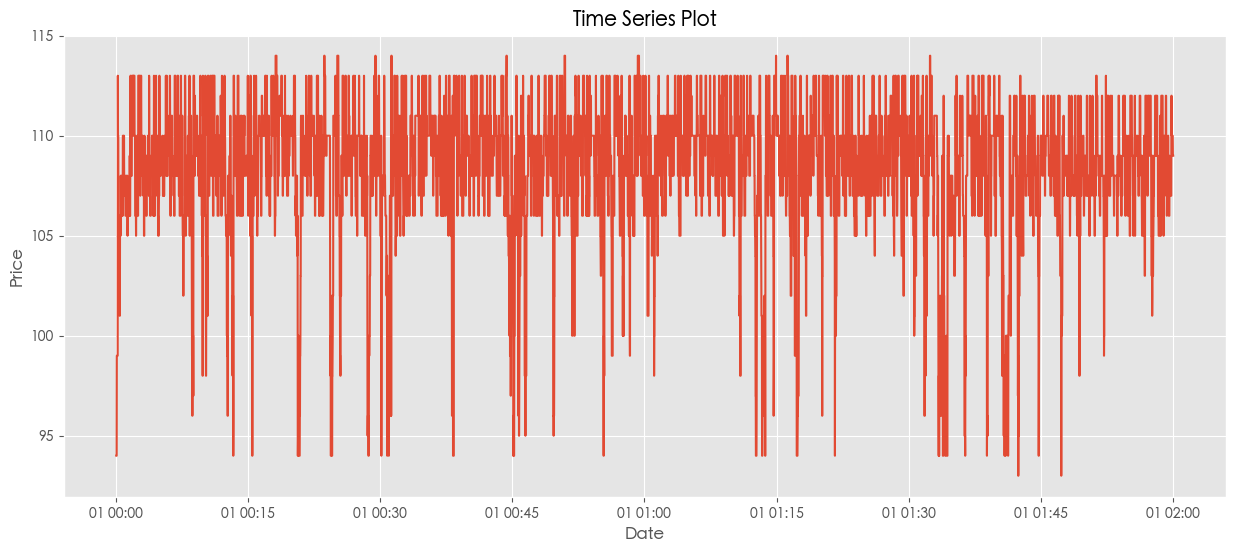

In [64]:
#checking if the data is stationary, thus judging if difference is needed
ADF(tape0701_arima.price)
tape0701_plt = tape0701_arima[tape0701_arima.index <= '1970-01-01 02:00:00']
plt.figure(figsize=(15, 6))
plt.plot(tape0701_plt.index, tape0701_plt['price'], linestyle='-',linewidth = 1.5)
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [72]:
## spliting testing set and training set
tape0701_test = tape0701_arima.tail(n=5000)
tape0701_train = tape0701_arima.drop(tape0701_arima.index[-5000:])
tape0701_test

price
time                         
1970-01-01 07:06:37 109.00000
1970-01-01 07:06:38 109.00000
1970-01-01 07:06:39 109.00000
1970-01-01 07:06:40 109.00000
1970-01-01 07:06:41 109.00000
...                       ...
1970-01-01 08:29:52 109.00000
1970-01-01 08:29:53 109.00000
1970-01-01 08:29:54 109.00000
1970-01-01 08:29:55 108.00000
1970-01-01 08:29:56 108.00000

[5000 rows x 1 columns]

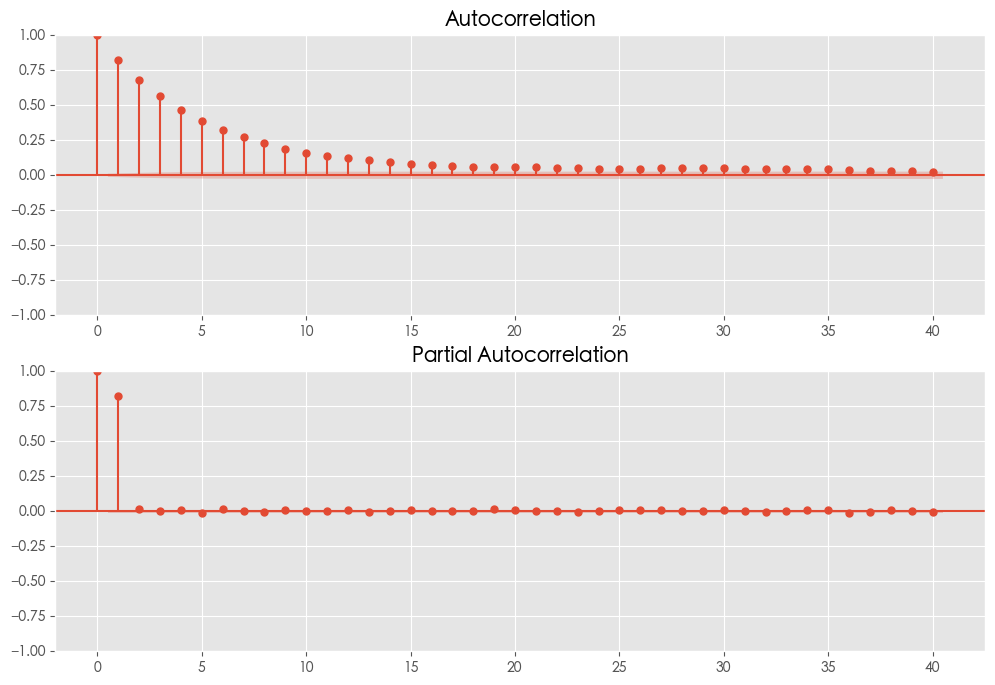

In [67]:
#from acf and pacf we can decide parameter p and q. 
#I may have insufficient understanding towards this part, so it needs further modification
fig = plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tape0701_arima.price,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tape0701_arima.price,lags=40,ax=ax2)

In [76]:
#normally there are several paramater sets that needs comparing using the following three evaluation metrics, the smaller the better
tape0701_train.index.freq = 'S'
arma_mod20 = sm.tsa.ARIMA(tape0701_train.price,order = (1,1,0)).fit() # data["xt"]是没有差分的数据
arma_mod30 = sm.tsa.ARIMA(tape0701_train.price,order = (0,1,1)).fit()
arma_mod40 = sm.tsa.ARIMA(tape0701_train.price,order = (1,1,1)).fit()
values = [[arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic],[arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic],[arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic]]
df = pd.DataFrame(values,index=["AR(1,1,0)","MA(0,1,1)","ARMA(1,1,1)"],columns=["AIC","BIC","hqic"])
df

AIC          BIC         hqic
AR(1,1,0)   109713.02028 109729.32027 109718.29017
MA(0,1,1)   109646.85584 109663.15583 109652.12573
ARMA(1,1,1) 107648.06476 107672.51475 107655.96960

In [70]:
#model fitting
result = sm.tsa.ARIMA(tape0701_train.price, order = (1,0,1)).fit()
print(result.summary())

/Users/gali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/Users/gali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)
/Users/gali/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency S will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                25592
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -53818.298
Date:                Sun, 03 Mar 2024   AIC                         107644.596
Time:                        12:26:27   BIC                         107677.197
Sample:                    01-01-1970   HQIC                        107655.136
                         - 01-01-1970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.1933      0.082   1314.817      0.000     108.032     108.355
ar.L1          0.8316      0.003    260.486      0.000       0.825       0.838
ma.L1         -0.0239      0.006     -4.082      0.0

In [ ]:
#ARMA model, unavailable for some reason

arma_mod20 = smt.ARMA(tape0701_test.price,(1,0)).fit() 
print(arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)
arma_mod30 = sm.tsa.ARMA(tape0701_test.price,(0,1)).fit()
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)
arma_mod40 = sm.tsa.ARMA(tape0701_test.price,(1,1)).fit()
print(arma_mod40.aic,arma_mod40.bic,arma_mod40.hqic)

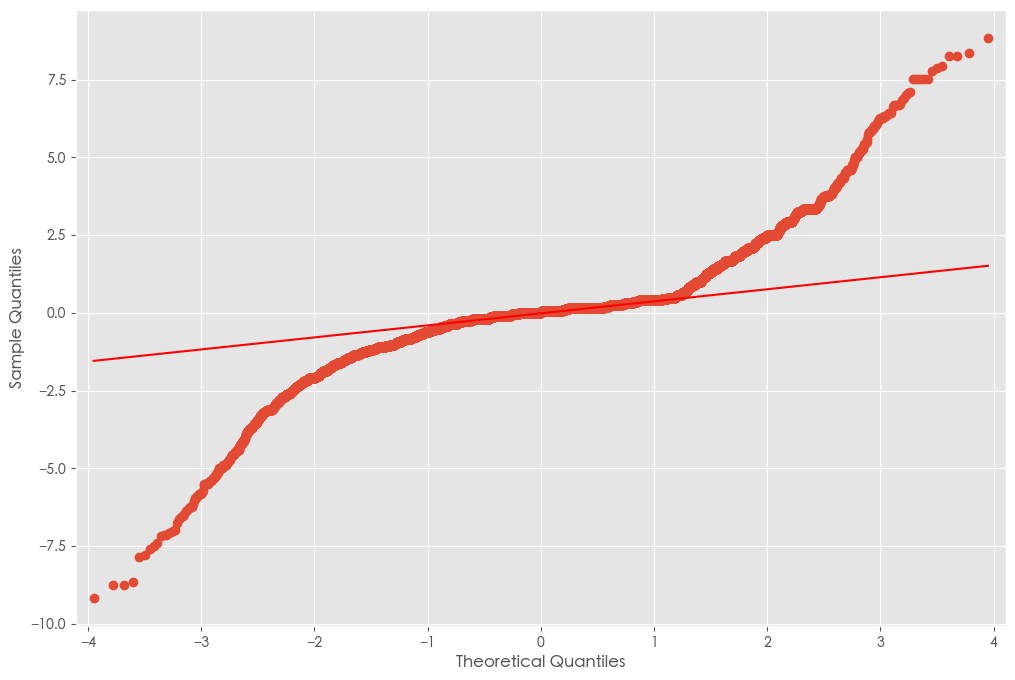

In [71]:
#model evaluation using residual, this is not an ideal outcome
resid = result.resid
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax, fit=True)

In [73]:
#prediction
pred = result.predict('1970-01-01 07:06:37', '1970-01-01 08:29:56',dynamic=True, typ='levels')
print (pred)

1970-01-01 07:06:37   108.76187
1970-01-01 07:06:38   108.66610
1970-01-01 07:06:39   108.58646
1970-01-01 07:06:40   108.52024
1970-01-01 07:06:41   108.46517
                         ...   
1970-01-01 08:29:52   108.19329
1970-01-01 08:29:53   108.19329
1970-01-01 08:29:54   108.19329
1970-01-01 08:29:55   108.19329
1970-01-01 08:29:56   108.19329
Freq: S, Name: predicted_mean, Length: 5000, dtype: float64


#showprediction
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(tape0701_test.price)
plt.show()